In [1]:
#Import the libraries
import pandas as pd
import numpy as np

In [2]:
#Load the dataset
df = pd.read_csv("/home/rajeev21august3261/Capstone Project/machinery_data.csv")

In [3]:
df.head(15)

,sensor_1,sensor_2,sensor_3,operational_hours,maintenance,RUL
0,0.496714,1.399355,-0.675178,831,0,4167.779109
1,-0.138264,0.924634,-0.144519,4061,0,937.137258
2,0.647689,0.059630,-0.792420,4801,0,197.222359
3,1.523030,-0.646937,-0.307962,2604,0,2393.654227
4,-0.234153,0.698223,-1.893615,714,0,4285.083772
5,-0.234137,0.393485,0.213294,3906,0,1092.711130
6,1.579213,0.895193,0.001205,1819,0,3177.235519
7,0.767435,0.635172,-0.817089,4869,0,126.650001
8,-0.469474,1.049553,0.659246,1687,0,3307.410677
9,0.542560,-0.535235,0.937570,1711,0,3282.465782


In [4]:
df.describe

<bound method NDFrame.describe of      sensor_1  sensor_2  sensor_3  operational_hours  maintenance          RUL
0    0.496714  1.399355 -0.675178                831            0  4167.779109
1   -0.138264  0.924634 -0.144519               4061            0   937.137258
2    0.647689  0.059630 -0.792420               4801            0   197.222359
3    1.523030 -0.646937 -0.307962               2604            0  2393.654227
4   -0.234153  0.698223 -1.893615                714            0  4285.083772
..        ...       ...       ...                ...          ...          ...
995 -0.281100  1.070150  0.077481               1855            0  3048.815969
996  1.797687 -0.026521  0.257753               1677            0  3224.787052
997  0.640843 -0.881875 -1.241761               1396            0  3507.269844
998 -0.571179 -0.163067  0.334176               3874            0  1029.669913
999  0.572583 -0.744903 -0.155259               2320            0  2583.997492

[1000 rows x 6 co

In [13]:
# Feature selection (prevents data leakage, improves model performance, Correct Workflow, reduces overfitting)
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'

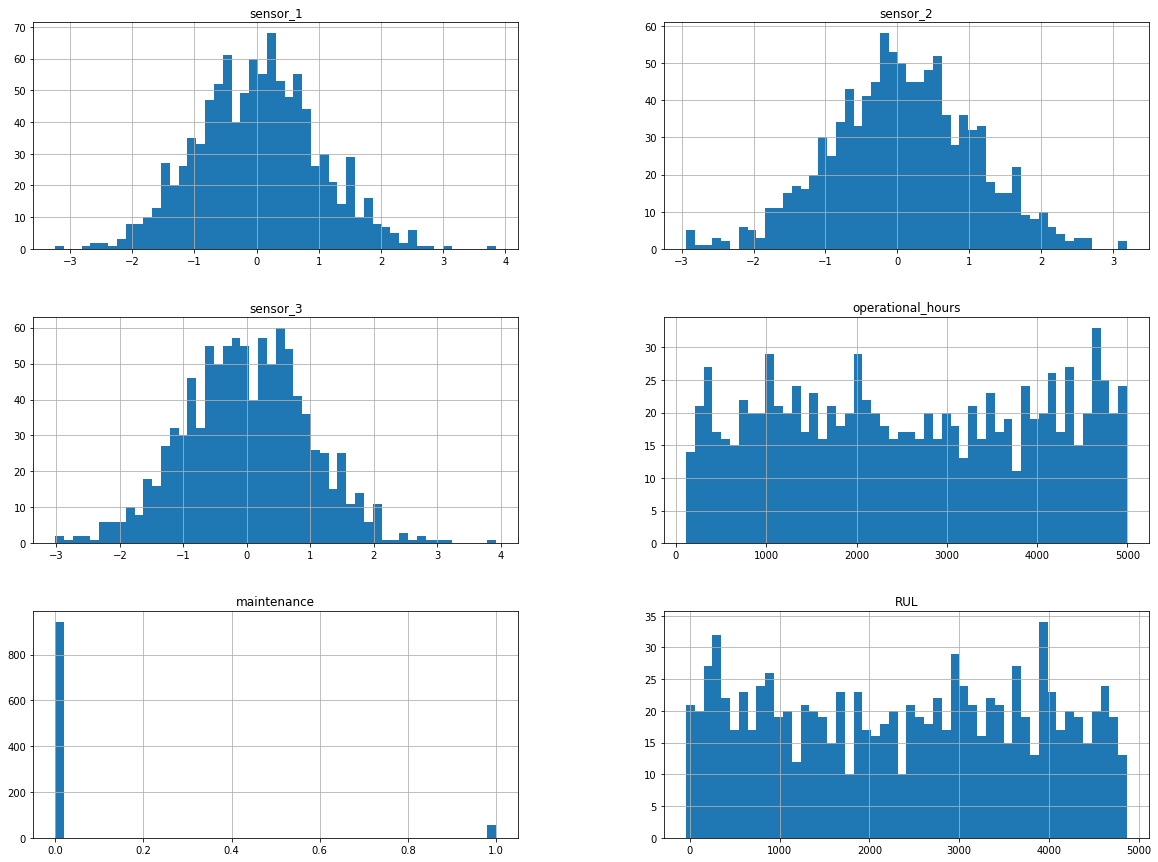

In [8]:
# Generates histograms for all numerical columns 

%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# Split data for regression and classification

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df[features], df[target_rul], test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(df[features], df[target_maintenance], test_size=0.2, random_state=42)

<AxesSubplot:xlabel='operational_hours', ylabel='RUL'>

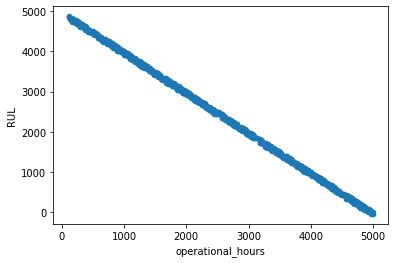

In [10]:
#Visualize the Data

df.plot(kind="scatter", x="operational_hours", y="RUL")

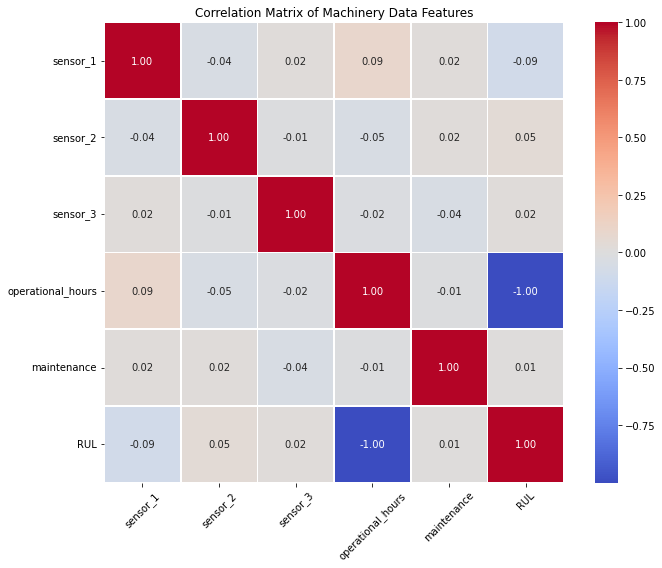

In [12]:
# Compute correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Machinery Data Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [63]:
# Data Cleaning / Handle missing values if any
print("Missing values per column:")
print(df.isnull().sum())

print("\nPercentage of missing values per column:")
print(df.isnull().mean() * 100)

Missing values per column:
sensor_1             0
sensor_2             0
sensor_3             0
operational_hours    0
maintenance          0
RUL                  0
cluster              0
dtype: int64

Percentage of missing values per column:
sensor_1             0.0
sensor_2             0.0
sensor_3             0.0
operational_hours    0.0
maintenance          0.0
RUL                  0.0
cluster              0.0
dtype: float64


In [15]:
df.fillna(method='ffill', inplace=True)

In [16]:
df.head(15)

,sensor_1,sensor_2,sensor_3,operational_hours,maintenance,RUL
0,0.496714,1.399355,-0.675178,831,0,4167.779109
1,-0.138264,0.924634,-0.144519,4061,0,937.137258
2,0.647689,0.059630,-0.792420,4801,0,197.222359
3,1.523030,-0.646937,-0.307962,2604,0,2393.654227
4,-0.234153,0.698223,-1.893615,714,0,4285.083772
5,-0.234137,0.393485,0.213294,3906,0,1092.711130
6,1.579213,0.895193,0.001205,1819,0,3177.235519
7,0.767435,0.635172,-0.817089,4869,0,126.650001
8,-0.469474,1.049553,0.659246,1687,0,3307.410677
9,0.542560,-0.535235,0.937570,1711,0,3282.465782


In [17]:
# Feature Scaling / StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [18]:
# Train regression model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [19]:
# Predict and evaluate
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Model MSE: {mse_reg}")

Regression Model MSE: 1099.3516626270966


In [20]:
# Train classification model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [21]:
# Predict and evaluate
y_pred_clf = clf_model.predict(X_test_clf)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
print(f"Classification Model Accuracy: {accuracy_clf}")
print(classification_report(y_test_clf, y_pred_clf))

Classification Model Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200



/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Train clustering model (Anomaly Detection, Support Predictive Maintenance)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

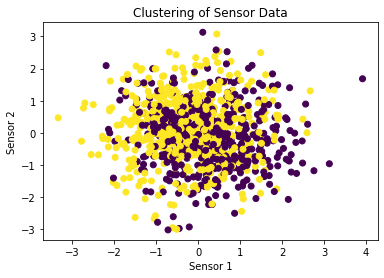

In [23]:
# Visualize clustering results
plt.scatter(df['sensor_1'], df['sensor_2'], c=df['cluster'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Clustering of Sensor Data')
plt.show()

In [24]:
def predict_maintenance(features):
    # Predict RUL
    rul_pred = reg_model.predict([features])
    
    # Predict maintenance status
    maint_pred = clf_model.predict([features])
    
    # Predict cluster (anomaly detection)
    cluster_pred = kmeans.predict([features])
    
    return {
        'RUL Prediction': rul_pred[0],
        'Maintenance Prediction': 'Needs Maintenance' if maint_pred[0] == 1 else 'Normal',
        'Anomaly Detection': 'Anomaly' if cluster_pred[0] == 1 else 'Normal'
    }

In [42]:
# Example prediction
features = [0.496714153, 1.399355437, -0.675178275, 831]
prediction = predict_maintenance(features)
print(prediction)

{'RUL Prediction': 4145.950859499996, 'Maintenance Prediction': 'Normal', 'Anomaly Detection': 'Normal'}


In [39]:
features = [-1.01283112, -0.651418004, -0.264514841, 4004]
prediction = predict_maintenance(features)
print(prediction)

{'RUL Prediction': 981.7217405200012, 'Maintenance Prediction': 'Needs Maintenance', 'Anomaly Detection': 'Normal'}


In [44]:
# Feature selection (prevents data leakage, improves model performance, Correct Workflow and to reduce Overfitting)
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'

In [45]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score
import numpy as np

#1. Regression Model with Cross-Validation (RUL prediction)
# Create K-Fold cross-validator
kfold_reg = KFold(n_splits=5, shuffle=True, random_state=42)

# Use neg_mean_squared_error because scikit-learn expects higher scores to be better
mse_scores = cross_val_score(
    reg_model, df[features], df[target_rul],
    scoring='neg_mean_squared_error',
    cv=kfold_reg
)

# Convert to positive MSE
mse_scores = -mse_scores
print("Cross-Validated MSE Scores (Regression):", mse_scores)
print("Average MSE:", mse_scores.mean())

Cross-Validated MSE Scores (Regression): [1137.38223423 1225.45412687 1193.93528411 1167.66579969 1012.00188415]
Average MSE: 1147.2878658106115


In [46]:
#2. Classification Model with Cross-Validation (Maintenance prediction)
# StratifiedKFold ensures balanced classes in each fold
kfold_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(
    clf_model, df[features], df[target_maintenance],
    scoring='accuracy',
    cv=kfold_clf
)

print("Cross-Validated Accuracy Scores (Classification):", accuracy_scores)
print("Average Accuracy:", accuracy_scores.mean())

Cross-Validated Accuracy Scores (Classification): [0.94  0.945 0.94  0.94  0.935]
Average Accuracy: 0.9399999999999998


In [47]:
#Create pipeline

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Pipeline for regression
reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Pipeline for classification
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [48]:
#fine-tune the Random Forest using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


param_grid_reg = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

param_grid_clf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [49]:
#Set up GridSearchCV with pipeline

from sklearn.pipeline import Pipeline

# reg_pipeline and clf_pipeline are pipelines

grid_search_reg = GridSearchCV(reg_pipeline, param_grid_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_clf = GridSearchCV(clf_pipeline, param_grid_clf, cv=5, scoring='accuracy', n_jobs=-1)

In [50]:
# Fit GridSearch to training data

grid_search_reg.fit(X_train_reg, y_train_reg)
grid_search_clf.fit(X_train_clf, y_train_clf)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                       

In [51]:
# Check best parameters and best scores

print("Best parameters for regression:", grid_search_reg.best_params_)
print("Best CV MSE (negative):", grid_search_reg.best_score_)

print("Best parameters for classification:", grid_search_clf.best_params_)
print("Best CV accuracy:", grid_search_clf.best_score_)

Best parameters for regression: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best CV MSE (negative): -1148.5692502554436
Best parameters for classification: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best CV accuracy: 0.93875


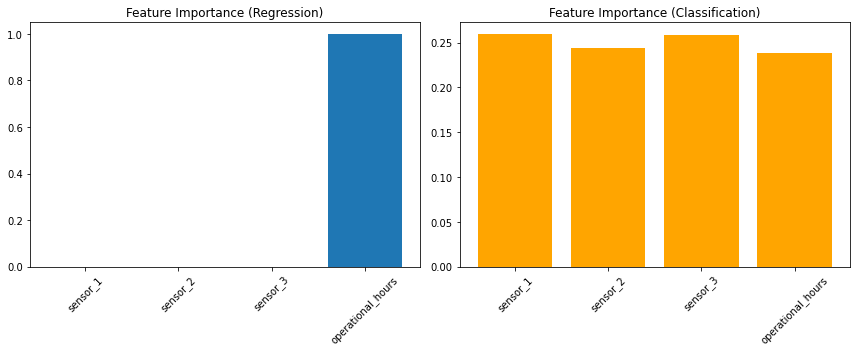

In [61]:
# Plot: Feature Importance (Regression + Classification)
# visualize which features are important for each model

importances_reg = reg_model.feature_importances_
importances_clf = clf_model.feature_importances_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(features, importances_reg)
plt.title('Feature Importance (Regression)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(features, importances_clf, color='orange')
plt.title('Feature Importance (Classification)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

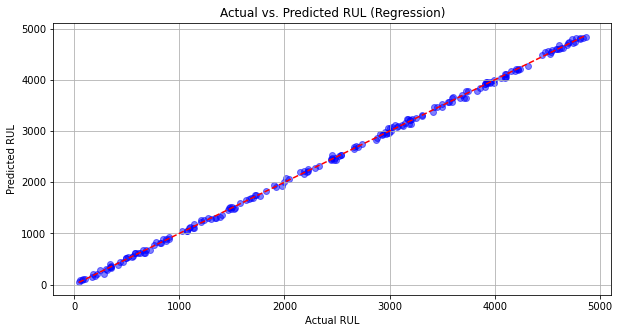

In [60]:
#1. Plot: Actual vs. Predicted RUL (Regression)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL (Regression)')
plt.grid(True)
plt.show()

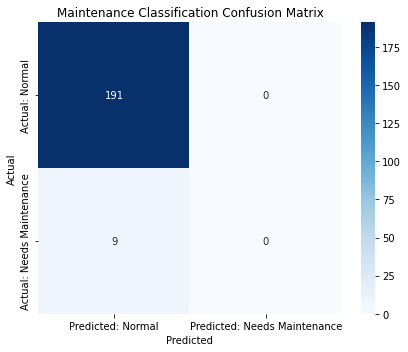

In [59]:
# Maintenance Classification Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Normal', 'Predicted: Needs Maintenance'],
            yticklabels=['Actual: Normal', 'Actual: Needs Maintenance'])
plt.title("Maintenance Classification Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

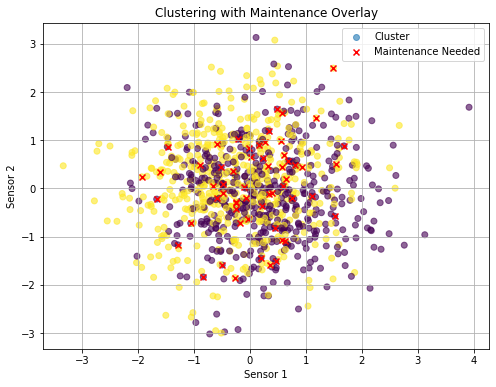

In [62]:
#Clustering Result With Maintenance Overlay
#Color code clusters and highlight points with maintenance == 1.

plt.figure(figsize=(8, 6))
plt.scatter(df['sensor_1'], df['sensor_2'], c=df['cluster'], cmap='viridis', alpha=0.6, label='Cluster')
plt.scatter(df[df['maintenance'] == 1]['sensor_1'],
            df[df['maintenance'] == 1]['sensor_2'],
            color='red', marker='x', label='Maintenance Needed')
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Clustering with Maintenance Overlay')
plt.legend()
plt.grid(True)
plt.show()
